# <span style="color:darkorange"> Exercises 07 (NSL) </span>
____________________

# <span style="color:darkorange"> 07.1: Tail corrections to MD_MC code </span>

To simplify the calculation of potential energy, the code takes into account the <span style="color:darkorange">contributions</span> coming only <span style="color:darkorange">from closely interacting particles</span>, thus applying a <span style="color:darkorange">spherical cutoff</span>, i.e. a limit distance beyond which the pair-wise potential vanishes.
If the system is in fact governed by a rapidly decreasing potential, the introduction of such a modification to the potential acts as a <span style="color:darkorange">small perturbation</span> on the predictions, provided that the cutoff radius is large enough. 

To compensate for the minor flaw of neglecting long-distance interactions, the reviewed code inlcudes the following <span style="color:darkorange">tail correction terms</span>:

$$
\frac{{\langle U^\star \rangle}_{tail}}{N} = \frac{8\pi}{3} \frac{\rho^\star}{\left(r_c^\star\right)^3} \left( \frac{1}{3\left(r_c^\star\right)^6} - 1 \right)
$$

$$
P^\star =  32 \pi N  \frac{\rho^\star}{\left(r_c^\star\right)^3}\left( \frac{1}{3\left(r_c^\star\right)^6}-\frac{1}{2} \right)
$$

where all quantities are expressed in <font color="darkorange">reduced Lennard-Jones units</font> ($\sigma$ for length, $\epsilon$ for energy, $m$ for mass).


____________________
# <span style="color:darkorange"> 07.2: Uncertainties and autocorrelations </span>

To print out the <font color="darkorange">instantaneous values</font> (`nblk=1`) for $U/N$, the simulation needs to be properly thermalized by using the Metropolis algorithm (`iNVET` = 1 for MC(NVT) moves), which works best if the <font color="darkorange">acceptance</font> is <font color="darkorange">near $50\%$</font>. Since temperature is fixed, the only tunable parameter to influence acceptance around $50\%$ is `delta`. Setting `nstep`$=5\times10^5$ for every phase and, respectively:

|  phase   | `delta` | $\rho^\star$ | $T^\star$ | $r_c^\star$ |
| -------- | ------- | ------------ | --------- | ----------- | 
| solid    |    $0.12$ | $1.1$          | $0.8$       |     $2.2$     |
| liquid   |    $0.19$     | $0.8$          | $1.1$       |     $2.5$     |
| gas      |     $7.3$    | $0.05$         | $1.2$       |     $5.0$     |


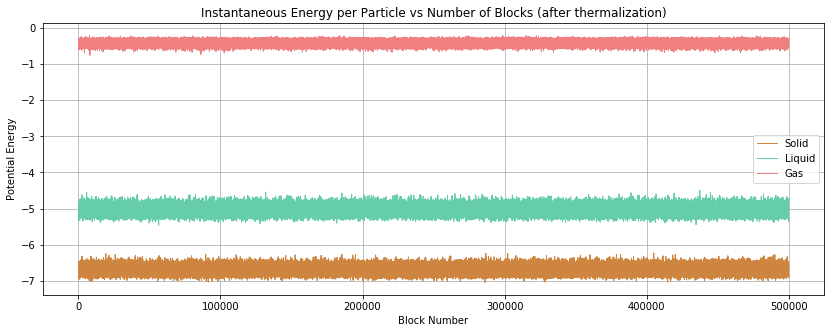

In [5]:
import matplotlib.pyplot as plt

# Initialize lists to store the block numbers and potential energy values for each phase
blocks_solid, potential_energy_solid = [], []
blocks_liquid, potential_energy_liquid = [], []
blocks_gas, potential_energy_gas = [], []

# Read the data for the solid phase
with open('./tail/7.2/output_epot_solid.dat', 'r') as file:
    for line in file:
        columns = line.split()
        block_number = int(columns[0])
        pot_energy_value = float(columns[1])
        blocks_solid.append(block_number)
        potential_energy_solid.append(pot_energy_value)

# Read the data for the liquid phase
with open('./tail/7.2/output_epot_liquid.dat', 'r') as file:
    for line in file:
        columns = line.split()
        block_number = int(columns[0])
        pot_energy_value = float(columns[1])
        blocks_liquid.append(block_number)
        potential_energy_liquid.append(pot_energy_value)

# Read the data for the gas phase
with open('./tail/7.2/output_epot_gas.dat', 'r') as file:
    for line in file:
        columns = line.split()
        block_number = int(columns[0])
        pot_energy_value = float(columns[1])
        blocks_gas.append(block_number)
        potential_energy_gas.append(pot_energy_value)

# Plot all three data sets on the same canvas
plt.figure(figsize=(14, 5))
plt.plot(blocks_solid, potential_energy_solid, color='peru', linestyle='-', linewidth=1, markersize=5, label='Solid')
plt.plot(blocks_liquid, potential_energy_liquid, color='mediumaquamarine', linestyle='-', linewidth=1, markersize=5, label='Liquid')
plt.plot(blocks_gas, potential_energy_gas, color='lightcoral', linestyle='-', linewidth=1, markersize=5, label='Gas')

# Add labels, title, legend, and grid
plt.xlabel('Block Number')
plt.ylabel('Potential Energy')
plt.title('Instantaneous Energy per Particle vs Number of Blocks (after thermalization)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

____________
## Vanishing of correlations

For measurements to be <font color="darkorange">independent</font>, they should be spaced by an <font color="darkorange">adequate time interval</font> that allows <font color="darkorange">correlations</font> to <font color="darkorange">vanish</font>. Otherwise, the estimators for physical quantities and for their uncertainties will suffer from a bias.
A measure of how fast correlations fade is given by the <font color="darkorange">autocorrelation function</font>, which is the statistical covariance of a stochastic process with a version of itself that has a <font color="darkorange">time lag</font> $t$:

$$ 
\displaystyle{\chi(t)} := 
\displaystyle{ Ac_{\left[U\right]}\left(t\right) } =
\displaystyle{ \frac{\langle U(t')U(t'+t) \rangle-\langle U(t') \rangle\langle U(t'+t) \rangle}{\sigma_U^2} } =
\displaystyle{ \frac{ \displaystyle{ \frac{1}{t_{max} - t} \sum_{t' = 0}^{t_{max} - t } U(t') U(t' + t) - \left( \frac{1}{t_{max} - t} \sum_{t' = 0}^{t_{max} - t } U(t') \right) \left( \frac{1}{t_{max} - t} \sum_{t' = 0}^{t_{max} - t } U(t'+t) \right) } } { \displaystyle{ \frac{1}{t_{max}} \sum_{t'=0}^{t_{max}} (U(t'))^2 - \left( \frac{1}{t_{max}} \sum_{t'=0}^{t_{max}} U(t') \right)^2 } } }
$$

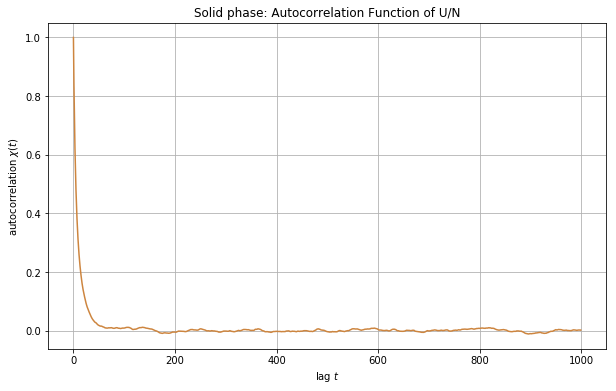

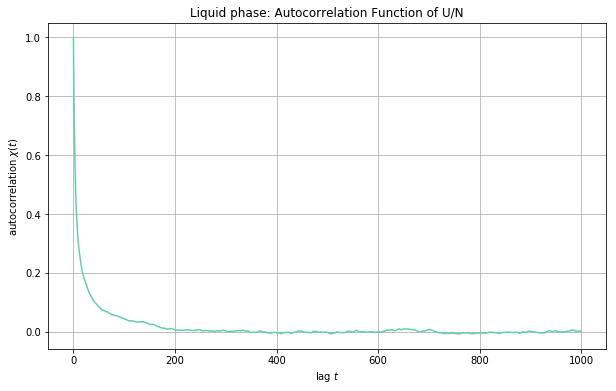

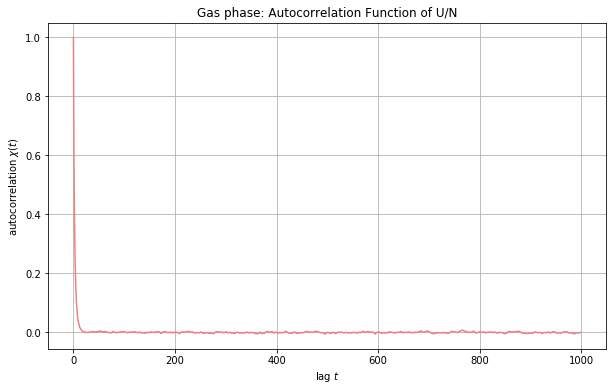

In [23]:
import numpy as np
import matplotlib.pyplot as plt

################## FUNCTIONS ##################

max_lag = 1000

# Function to calculate autocorrelation
def autocorrelation(data, max_lag):
    t_max = len(data)
    mean = np.mean(data)
    var = np.var(data)
    acf = []

    for t in range(max_lag):
        cov = np.mean([data[tprime] * data[tprime + t] for tprime in range(t_max - t)]) - \
              np.mean([data[tprime] for tprime in range(t_max - t)]) * \
              np.mean([data[tprime + t] for tprime in range(t_max - t)])
        acf.append(cov / var)

    return np.array(acf)

# Function to plot autocorrelation
def plot_autocorrelation(data, phase, color, max_lag):
    acf = autocorrelation(data, max_lag)
    plt.figure(figsize=(10, 6))
    plt.plot(range(max_lag), acf, color=color)
    plt.xlabel('lag $t$')
    plt.ylabel('autocorrelation $\chi(t)$')
    plt.title(f'{phase.capitalize()} phase: Autocorrelation Function of U/N')
    plt.grid(True)
    plt.show()
    return acf

# Function to read data from a file and extract the second column
def read_data(file_path):
    data = np.loadtxt(file_path, usecols=1)  # Assuming second column contains potential energy values
    return data

################## MAKE PLOTS ##################

# File paths
solid_file = './tail/7.2/output_epot_solid.dat'
liquid_file = './tail/7.2/output_epot_liquid.dat'
gas_file = './tail/7.2/output_epot_gas.dat'

# Read data from files
solid_data = read_data(solid_file)
liquid_data = read_data(liquid_file)
gas_data = read_data(gas_file)

# Plot autocorrelation for each phase with specified colors
acf_solid = plot_autocorrelation(solid_data, 'solid', 'peru', max_lag)
acf_liquid = plot_autocorrelation(liquid_data, 'liquid', 'mediumaquamarine', max_lag)
acf_gas = plot_autocorrelation(gas_data, 'gas', 'lightcoral', max_lag)

____________
## Data blocking

A versatile method for error estimation is dividing the $M$ data into $L=M/N$ blocks of size $N$ and considering the <font color="darkorange">average from each block</font> as a single measurement, thus dealing with <font color="darkorange">uncorrelated</font> quantities, provided that the blocks are <font color="darkorange">large enough</font>. 
A <font color="darkorange">modest uncertainty</font> about a block average is not a demerit, but rather an indication that the Metropolis moves are not so correlated that the block estimate becomes flawed because of a systematic underestimation or overestimation tendency.

The plots show the <font color="darkorange">estimation of the statistical uncertainty</font> of $\langle U/N \rangle$, for block sizes that range in the interval $\left[ 10, 5\times 10^3 \right]$:



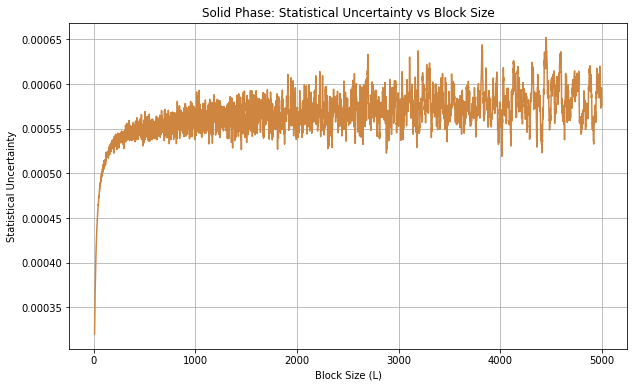

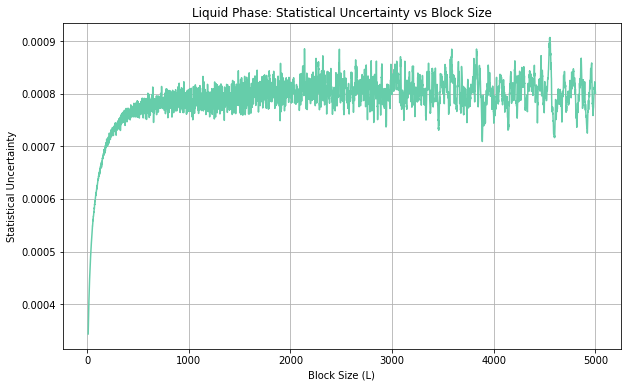

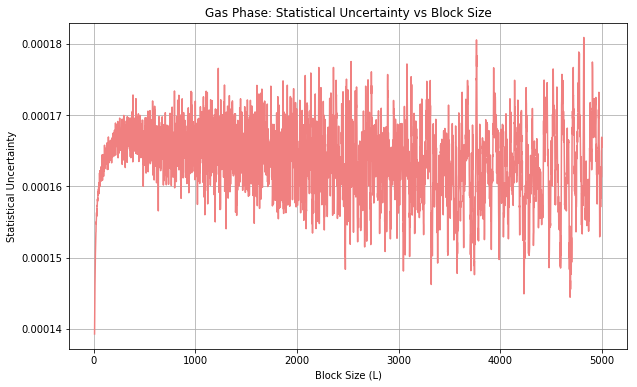

In [24]:
import numpy as np
import matplotlib.pyplot as plt

################## FUNCTIONS ##################

# function to read file
def read_data(file_path):
    data = np.loadtxt(file_path, usecols=1)  # second column contains potential U/N estimates
    return data

# function to perform different groupings for data blocking on a long list of M data
def data_blocking(data, min_block_size=10, max_block_size=5000):
    M = len(data)
    block_sizes = np.arange(min_block_size, max_block_size + 1, 1)
    means = []
    uncertainties = []
    for L in block_sizes:
        if L > M:
            break
        N = M // L # floor division
        block_means = np.array([np.mean(data[i*L:(i+1)*L]) for i in range(N)]) # 
        mean = np.mean(block_means) # mean of a blk
        std_dev = np.std(block_means) / np.sqrt(N - 1) # uncertainty of a single blk ave
        means.append(mean) # save to list
        uncertainties.append(std_dev) # save to list
    return block_sizes, np.array(means), np.array(uncertainties) # the means list is not really used...

# function to do plot of uncertainties
def plot_uncertainties(block_sizes, uncertainties, phase, color):
    plt.figure(figsize=(10, 6))
    plt.plot(block_sizes, uncertainties, '-', color=color)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Block Size (L)')
    plt.ylabel('Statistical Uncertainty')
    plt.title(f'{phase.capitalize()} Phase: Statistical Uncertainty vs Block Size')
    plt.grid(True)
    plt.show()

################## MAKE PLOTS ##################
    
# define file paths
solid_file = './tail/7.2/output_epot_solid.dat'
liquid_file = './tail/7.2/output_epot_liquid.dat'
gas_file = './tail/7.2/output_epot_gas.dat'
# read data from files
solid_data = read_data(solid_file)
liquid_data = read_data(liquid_file)
gas_data = read_data(gas_file)
# calculate errors for different block sizes
block_sizes_solid, means_solid, uncertainties_solid = data_blocking(solid_data)
block_sizes_liquid, means_liquid, uncertainties_liquid = data_blocking(liquid_data)
block_sizes_gas, means_gas, uncertainties_gas = data_blocking(gas_data)
# plot statistical uncertainties for each phase
plot_uncertainties(block_sizes_solid, uncertainties_solid, 'solid', 'peru')
plot_uncertainties(block_sizes_liquid, uncertainties_liquid, 'liquid', 'mediumaquamarine')
plot_uncertainties(block_sizes_gas, uncertainties_gas, 'gas', 'lightcoral')



In view of the above, it is reasonable to assume that a  <font color="darkorange">block size of $N=1000$</font> is a reasonable choice.

____________________
# <span style="color:darkorange"> 07.3: Radial distribution function </span>

The <a href="https://chem.libretexts.org/Bookshelves/Biological_Chemistry/Concepts_in_Biophysical_Chemistry_(Tokmakoff)/01%3A_Water_and_Aqueous_Solutions/01%3A_Fluids/1.02%3A_Radial_Distribution_Function"><font color="darkorange">RDF</font></a> $g(r)$ for $r \in \left( 0, L/2\right)$  can be obtained as a <font color="darkorange">histogram</font> with:

$$
g(r^\star) = \frac{1}{\rho^\star N \frac{4 \pi}{3} \left[ ( r^\star+dr^\star )^3 - (r^\star)^3 \right]} \left\langle \sum_{i=1}^{N} \sum_{j \neq i = 1}^{N} \delta\left( r^\star - \left| \vec{r^\star_i} - \vec{r^\star_j} \right|\right) \right\rangle,
$$

thus, each block yields $g(r)$ estimated at `N_bins` different points in $\left( 0, L/2\right)$.

average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

____________________
# <span style="color:darkorange"> 07.4: Lennard-Jones model </span>